### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="2a4ee6033beb3fa5df5fd7c08409cf1d30b8e4bc"

In [ ]:
import pandas as pd
import requests

def fetch_data_from_tiingo(symbol, api_key, start_date):
    url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&token={api_key}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# Example usage
api_key = "2a4ee6033beb3fa5df5fd7c08409cf1d30b8e4bc"
symbol = "AAPL"  # Example symbol (Apple Inc.)
start_date = "2015-01-01"
data = fetch_data_from_tiingo(symbol, api_key, start_date)

if data:
    if len(data) > 0:
        # Convert JSON data to DataFrame
        df = pd.DataFrame(data)
        print("DataFrame created successfully:")
        print(df.tail())
    else:
        print("No data returned from the API.")


DataFrame created successfully:
                          date   close     high     low     open     volume  \
2345  2024-04-29T00:00:00.000Z  173.50  176.030  173.10  173.370   68169419   
2346  2024-04-30T00:00:00.000Z  170.33  174.990  170.00  173.330   65934776   
2347  2024-05-01T00:00:00.000Z  169.30  172.705  169.11  169.580   50383147   
2348  2024-05-02T00:00:00.000Z  173.03  173.415  170.89  172.510   94214915   
2349  2024-05-03T00:00:00.000Z  183.38  187.000  182.66  186.645  163224109   

      adjClose  adjHigh  adjLow  adjOpen  adjVolume  divCash  splitFactor  
2345    173.50  176.030  173.10  173.370   68169419      0.0          1.0  
2346    170.33  174.990  170.00  173.330   65934776      0.0          1.0  
2347    169.30  172.705  169.11  169.580   50383147      0.0          1.0  
2348    173.03  173.415  170.89  172.510   94214915      0.0          1.0  
2349    183.38  187.000  182.66  186.645  163224109      0.0          1.0  


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2015-01-02T00:00:00.000Z,109.33,111.44,107.350,111.39,53204626,24.434066,24.905628,23.991558,24.894454,212818504,0.0,1.0
1,1,2015-01-05T00:00:00.000Z,106.25,108.65,105.410,108.29,64285491,23.745720,24.282094,23.557989,24.201638,257141964,0.0,1.0
2,2,2015-01-06T00:00:00.000Z,106.26,107.43,104.630,106.54,65797116,23.747955,24.009437,23.383667,23.810532,263188464,0.0,1.0
3,3,2015-01-07T00:00:00.000Z,107.75,108.20,106.695,107.20,40105934,24.080954,24.181524,23.845173,23.958035,160423736,0.0,1.0
4,4,2015-01-08T00:00:00.000Z,111.89,112.15,108.700,109.23,59364547,25.006199,25.064306,24.293268,24.411717,237458188,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2345,2345,2024-04-29T00:00:00.000Z,173.50,176.030,173.10,173.370,68169419,173.50,176.030,173.10,173.370,68169419,0.0,1.0
2346,2346,2024-04-30T00:00:00.000Z,170.33,174.990,170.00,173.330,65934776,170.33,174.990,170.00,173.330,65934776,0.0,1.0
2347,2347,2024-05-01T00:00:00.000Z,169.30,172.705,169.11,169.580,50383147,169.30,172.705,169.11,169.580,50383147,0.0,1.0
2348,2348,2024-05-02T00:00:00.000Z,173.03,173.415,170.89,172.510,94214915,173.03,173.415,170.89,172.510,94214915,0.0,1.0
2349,2349,2024-05-03T00:00:00.000Z,183.38,187.000,182.66,186.645,163224109,183.38,187.000,182.66,186.645,163224109,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       109.33
1       106.25
2       106.26
3       107.75
4       111.89
         ...  
2339    165.00
2340    165.84
2341    166.90
2342    169.02
2343    169.89
Name: close, Length: 2344, dtype: float64

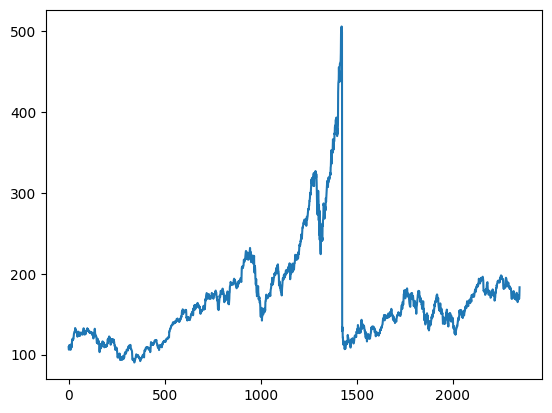

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0       109.33
1       106.25
2       106.26
3       107.75
4       111.89
         ...  
2339    165.00
2340    165.84
2341    166.90
2342    169.02
2343    169.89
Name: close, Length: 2344, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.04567649]
 [0.03826819]
 [0.03829224]
 ...
 [0.18992183]
 [0.19889357]
 [0.22378833]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1527, 823)

In [ ]:
train_data

array([[0.04567649],
       [0.03826819],
       [0.03829224],
       ...,
       [0.11720986],
       [0.12647023],
       [0.1270475 ]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1426, 100)
(1426,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(722, 100)
(722,)


(None, None)

In [ ]:
# Concatenate training and test target variables
all_y = np.concatenate([y_train, ytest])

# Find the minimum and maximum values
min_value = np.min(all_y)
max_value = np.max(all_y)

print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 0.0
Maximum value: 1.0


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 12s 246ms/step - loss: 0.0239 - val_loss: 5.1001e-04
Epoch 2/100
23/23 [==============================] - 4s 183ms/step - loss: 0.0056 - val_loss: 3.5089e-04
Epoch 3/100
23/23 [==============================] - 5s 239ms/step - loss: 0.0046 - val_loss: 5.3842e-04
Epoch 4/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0040 - val_loss: 3.5257e-04
Epoch 5/100
23/23 [==============================] - 5s 216ms/step - loss: 0.0035 - val_loss: 2.7562e-04
Epoch 6/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0035 - val_loss: 2.6881e-04
Epoch 7/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0028 - val_loss: 3.8137e-04
Epoch 8/100
23/23 [==============================] - 6s 260ms/step - loss: 0.0026 - val_loss: 2.9994e-04
Epoch 9/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0024 - val_loss: 6.2123e-04
Epoch 10/100
23/23 [==============================] - 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 [==============================] - 1s 35ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

189.08136003603383

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

162.97938008230312

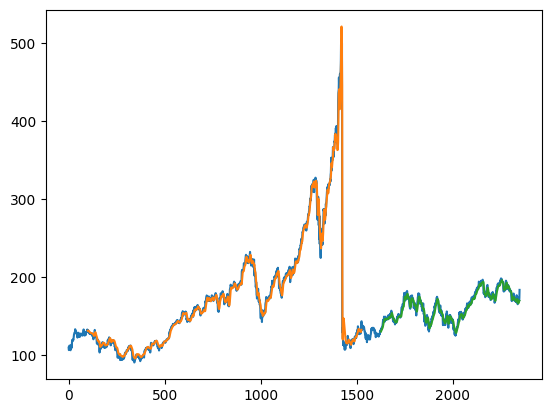

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

blue is compelete dataset
test data output green color
train data orange


In [ ]:
len(test_data) #lot of logic needed

823

In [ ]:
x_input=test_data[723:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.24736019242333135,
 0.251040288634997,
 0.25885748647023454,
 0.25921828021647625,
 0.257919422730006,
 0.2538785327720986,
 0.2564040889957907,
 0.2513289236319904,
 0.2509681298857487,
 0.24837041491280815,
 0.24704750450992186,
 0.24728803367408297,
 0.248322309079976,
 0.24579675285628383,
 0.2292242934455802,
 0.2258809380637402,
 0.22025255562236917,
 0.2184966927239928,
 0.22903187011425136,
 0.22802164762477445,
 0.2305472038484666,
 0.22910402886349968,
 0.22989777510523146,
 0.22438965724594107,
 0.22210463018641013,
 0.23641611545399877,
 0.24346361996392063,
 0.2490679494888755,
 0.25217077570655444,
 0.25053517739025855,
 0.2497414311485267,
 0.2455321707757065,
 0.24387251954299455,
 0.23499699338544794,
 0.22624173180998197,
 0.2321587492483464,
 0.22972940469031866,
 0.23413108839446783,
 0.23802766085387855,
 0.23829224293445578,
 0.2356704750450992,
 0.23694527961515333,
 0.2328562838244137,
 0.22778111846061333,
 0.2256404088995791,
 0.22494287432351173,
 0.221214

In [ ]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<3):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.22171978 0.21844859 0.22198437 0.21907396 0.21746242 0.21484065
 0.20387252 0.19189417 0.18948888 0.18920024 0.1933614  0.19822008
 0.19937462 0.19432351 0.19882141 0.1979074  0.20055322 0.20622971
 0.21245941 0.19490078 0.1970896  0.19365003 0.190908   0.19956705
 0.19516536 0.19167769 0.18881539 0.19076368 0.18876729 0.19059531
 0.18787733 0.19081179 0.18626578 0.2037282  0.20736019 0.19807577
 0.19011425 0.18679495 0.18448587 0.17957907 0.18159952 0.18414913
 0.18924835 0.19134095 0.18992183 0.20002405 0.19239928 0.18992183
 0.19889357 0.22378833 0.19641916 0.19911447 0.19988638 0.1995862
 0.19882494 0.19791795 0.19700204 0.19613047 0.19532178 0.19458017
 0.19390303 0.19328347 0.19271211 0.19217835 0.20345986 0.20302694
 0.20324631 0.20402013 0.20520568 0.20666961 0.20830652 0.21004121
 0.21182285 0.21361859 0.21540749 0.21717605 0.21891521 0.22061862
 0.22228178 0.22390154 0.2254757  0.22700317 0.22848362 0.22991771
 0.2313066  0.23265235 0.23395731 0.23522419 0.2364

In [ ]:
print(yhat)

[[0.24852046]]


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,104)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2350

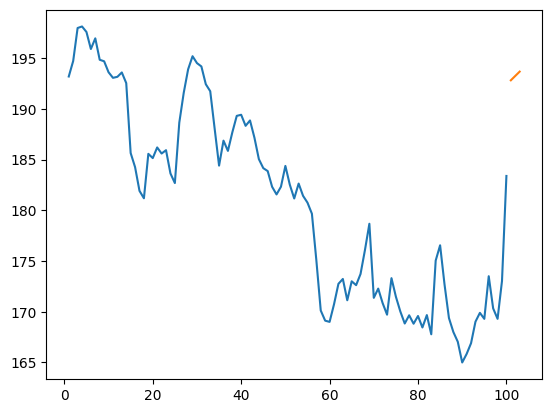

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2250:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

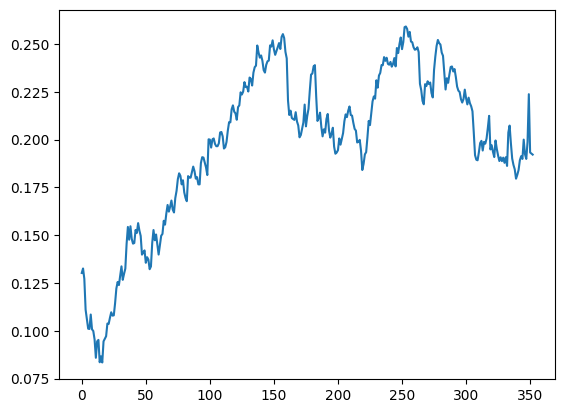

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

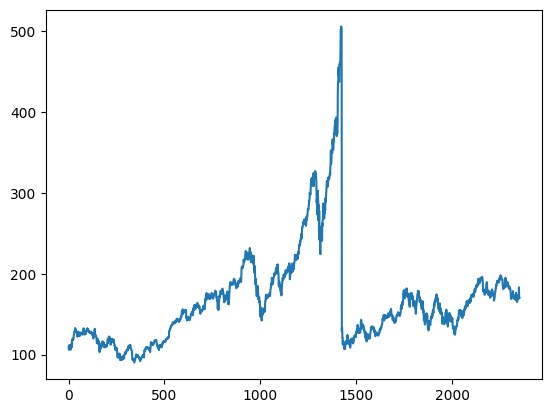

In [ ]:
plt.plot(df3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Use only the 'close' column for prediction
data = df['close'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size, :], data_normalized[train_size:len(data_normalized), :]

# Function to create sequences for LSTM
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

# Number of time steps
n_steps = 100

# Create sequences for LSTM
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions for the next 30 days
print("Predicted stock prices for the next 30 days:")
print(predictions[-30:])


Epoch 1/10
56/56 [==============================] - 18s 219ms/step - loss: 0.0091
Epoch 2/10
56/56 [==============================] - 13s 239ms/step - loss: 0.0034
Epoch 3/10
56/56 [==============================] - 7s 132ms/step - loss: 0.0027
Epoch 4/10
56/56 [==============================] - 8s 145ms/step - loss: 0.0025
Epoch 5/10
56/56 [==============================] - 8s 144ms/step - loss: 0.0019
Epoch 6/10
56/56 [==============================] - 7s 124ms/step - loss: 0.0018
Epoch 7/10
56/56 [==============================] - 8s 145ms/step - loss: 0.0016
Epoch 8/10
56/56 [==============================] - 7s 133ms/step - loss: 0.0016
Epoch 9/10
56/56 [==============================] - 8s 141ms/step - loss: 0.0022
Epoch 10/10
12/12 [==============================] - 2s 36ms/step
Predicted stock prices for the next 30 days:
[[176.87999]
 [177.37616]
 [177.61679]
 [177.55939]
 [177.39545]
 [177.1418 ]
 [176.77493]
 [176.27486]
 [175.71387]
 [175.11801]
 [174.56033]
 [174.03656]
 [

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions for the next 30 days
print("Predicted stock prices for the next 30 days:")
print(predictions[-30:])

12/12 [==============================] - 0s 35ms/step
Predicted stock prices for the next 30 days:
[[176.87999]
 [177.37616]
 [177.61679]
 [177.55939]
 [177.39545]
 [177.1418 ]
 [176.77493]
 [176.27486]
 [175.71387]
 [175.11801]
 [174.56033]
 [174.03656]
 [173.61153]
 [173.22995]
 [173.1748 ]
 [173.54216]
 [174.11409]
 [174.61638]
 [174.88615]
 [174.8588 ]
 [174.4884 ]
 [173.87831]
 [173.18181]
 [172.58684]
 [172.20116]
 [172.01575]
 [172.16559]
 [172.49643]
 [172.86472]
 [173.345  ]]


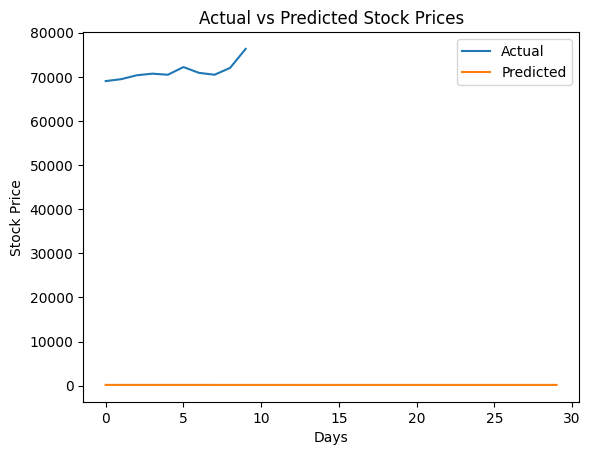

In [ ]:
import matplotlib.pyplot as plt

# Plot the last 10 days of test data
plt.plot(y_test[-10:], label='Actual')

# Plot the predicted stock prices for the next 30 days
plt.plot(predictions[-30:], label='Predicted')

plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
